# Final project
## Preprocessing Corn Yield Data
##### **Name:** Letícia Santos
##### **Course/Semester:** Agron 935 D/Spring 2020
##### **Project area:** Plant Science
##### **Last update:** Apr-24-2020

#### Table of contents
1. Description
2. Required Modules
3. Import data
4. Pre-analysis of data - scatter plot and histogram
5. Data Wragling
6. Filter Data
7. Output


## 1) Description

*Inputs:* .csv file with 4 columns: Distance, Swathwidth, Varyyieldvol, SectionID, Crop
    WetMass, Moisture, Time, Heading, Variety, Elevation, IsoTime, layer, path,
    X and Y, where:
    Harvest Machine Dataset
- Distance: travelled distance (m) 
- Swathwidth: Plataform (m)
- Varyyieldvol: Bushes/acre 
- SectionID: 
- Crop: Code of the culture
- WetMass: 
- Moisture: (%)
- Time: (mm/dd/yyyy hr:min:sec am/pm)
- Heading:
- Variety: Cultivar
- Elevation: (m)
- IsoTime 
- Layer: Field
- Path: Directory
- X : Longitude
- Y : Latitude

## 2) Required modules

In [1]:
import pandas as pd
import xlrd
import numpy as np
import datetime as dt
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt

## 3) Upload data

In [2]:
df_yield = pd.read_excel("../data/yielddata.xlsx")
df_yield.head()

,wkt_geom,DISTANCE,SWATHWIDTH,VRYIELDVOL,SECTIONID,Crop,WetMass,Moisture,Time,Heading,VARIETY,Elevation,IsoTime,layer,path,X,Y
0,MultiPointZ ((464000.56825358472997323 3842332...,5.781322,5,97.338404,751,173,5614.507439,17.48,2018-09-03 17:37:07,91.971235,33F-87VT3,585.151713,2018-09-03T17:37:07.183Z,Posey Farms-Hall Place-Big Hall-Corn,T:/AgAdmin/CSES/Crops/2018/CIG project/Posey/G...,464000.5682,3842332.947
1,MultiPointZ ((464002.27628496306715533 3842332...,5.584472,5,92.333471,751,173,5325.182448,17.47,2018-09-03 17:37:08,92.371235,33F-87VT3,585.138590,2018-09-03T17:37:08.185Z,Posey Farms-Hall Place-Big Hall-Corn,T:/AgAdmin/CSES/Crops/2018/CIG project/Posey/G...,464002.2762,3842332.843
2,MultiPointZ ((464003.82907277665799484 3842332...,5.092346,5,91.567134,751,173,5280.344748,17.46,2018-09-03 17:37:09,92.221235,33F-87VT3,585.325598,2018-09-03T17:37:09.187Z,Posey Farms-Hall Place-Big Hall-Corn,T:/AgAdmin/CSES/Crops/2018/CIG project/Posey/G...,464003.8290,3842332.792
3,MultiPointZ ((464005.40157197782536969 3842332...,5.157963,5,118.491661,751,173,6832.977796,17.46,2018-09-03 17:37:10,92.231235,33F-87VT3,585.453550,2018-09-03T17:37:10.190Z,Posey Farms-Hall Place-Big Hall-Corn,T:/AgAdmin/CSES/Crops/2018/CIG project/Posey/G...,464005.4015,3842332.719
4,MultiPointZ ((464006.9831428499892354 3842332....,5.190771,5,117.756997,751,173,6789.789787,17.45,2018-09-03 17:37:11,92.161235,33F-87VT3,585.453550,2018-09-03T17:37:11.191Z,Posey Farms-Hall Place-Big Hall-Corn,T:/AgAdmin/CSES/Crops/2018/CIG project/Posey/G...,464006.9831,3842332.663


In [3]:
#1 foot = 30 cm
df_yield['Speed'] = (df_yield['DISTANCE']/1) * 0.68 #feet/sec ->  mph


In [4]:
#Checking object type
print(type(df_yield))
print(df_yield.shape)

<class 'pandas.core.frame.DataFrame'>
(91204, 18)


In [5]:
#checking Columns for selection
df_yield.columns

Index(['wkt_geom', 'DISTANCE', 'SWATHWIDTH', 'VRYIELDVOL', 'SECTIONID', 'Crop',
       'WetMass', 'Moisture', 'Time', 'Heading', 'VARIETY', 'Elevation',
       'IsoTime', 'layer', 'path', 'X', 'Y', 'Speed'],
      dtype='object')

## 4) Pre-analysis of data

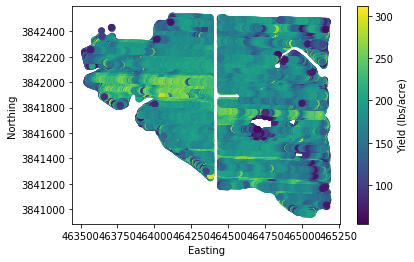

In [6]:
#Plot the raw data
plt.scatter(df_yield["X"], df_yield["Y"], c=df_yield["VRYIELDVOL"])
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.colorbar(label="Yield (lbs/acre)")
plt.show()

In [7]:
df_yield['VRYIELDVOL'].min()

54.03414409

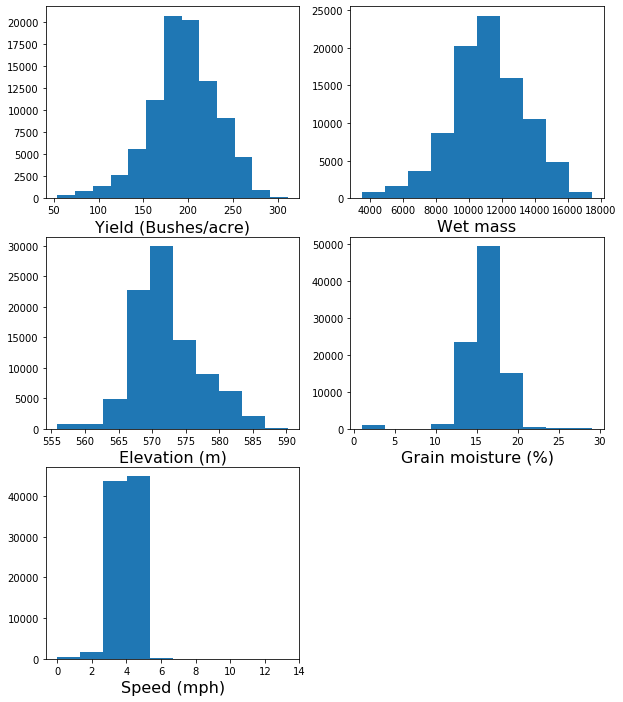

In [8]:
#Examine the data for each variable using histograms

plt.figure(figsize=(10,12))

plt.subplot(3,2,1)
plt.hist(df_yield["VRYIELDVOL"], bins=13)
plt.xlabel("Yield (Bushes/acre)", size=16)

plt.subplot(3,2,2)
plt.hist(df_yield["WetMass"])
plt.xlabel("Wet mass", size=16)

plt.subplot(3,2,3)
plt.hist(df_yield["Elevation"])
plt.xlabel("Elevation (m)", size=16)

plt.subplot(3,2,4)
plt.hist(df_yield["Moisture"])
plt.xlabel("Grain moisture (%)", size=16)

plt.subplot(3,2,5)
plt.hist(df_yield["Speed"])
plt.xlabel("Speed (mph)", size=16)

plt.show()

## 5) Data Wragling

In [9]:
#Data Wragling
#Selecting Interested Variables
dfw_yield = df_yield.loc[:,['X', 'Y', 'VRYIELDVOL', 'IsoTime', 'Moisture']]
dfw_yield.head()

,X,Y,VRYIELDVOL,IsoTime,Moisture
0,464000.5682,3842332.947,97.338404,2018-09-03T17:37:07.183Z,17.48
1,464002.2762,3842332.843,92.333471,2018-09-03T17:37:08.185Z,17.47
2,464003.8290,3842332.792,91.567134,2018-09-03T17:37:09.187Z,17.46
3,464005.4015,3842332.719,118.491661,2018-09-03T17:37:10.190Z,17.46
4,464006.9831,3842332.663,117.756997,2018-09-03T17:37:11.191Z,17.45
...,...,...,...,...,...
91199,464857.0280,3842489.389,128.249245,2018-09-09T13:41:53.570Z,14.56
91200,464855.1704,3842489.474,126.402715,2018-09-09T13:41:54.571Z,14.62
91201,464853.3064,3842489.565,119.380286,2018-09-09T13:41:55.573Z,14.73
91202,464851.4545,3842489.642,121.060802,2018-09-09T13:41:56.565Z,14.75


## 6) Filter Data
Setting conditions to clean Data
1. Discart +3$\sigma$ and -3$\sigma$  
2. 1 point each 5 seconds
3. NaN
4. Moisture limits


In [10]:
# 1 condition - One value for each 5s - Separeta each condition in the chunks

dfw_yield['Datetime'] = pd.to_datetime(dfw_yield["IsoTime"]) #Transform Isotime in datetime object
dfw_yield['seconds'] = dfw_yield.Datetime.dt.second #Create an second variable from Datetime
time = dfw_yield[dfw_yield.seconds % 5 == 0]

#at the end of each chunk print head() - array for other types of data - inspect 

In [24]:
# 2 condition = +3$\sigma$ and -3$\sigma$   - Explore quantiles
std = np.std(dfw_yield['VRYIELDVOL'])
mean = np.mean(dfw_yield['VRYIELDVOL'])
upper_limit = mean + std * 3
low_limit = mean - std * 3

#put a vertical bar in the histogram
print ("Yield Upper Limit: ", upper_limit)
print ("Yield Low Limit: ", low_limit)
print ("Yield Mean:", mean )

# Create a new dataset with the values on the range of upper and low limits - from time:
std_ind = time[(time['VRYIELDVOL'] <= upper_limit) & (time['VRYIELDVOL'] >= low_limit)]

std_ind.head()

Yield Upper Limit:  308.4108926568857
Yield Low Limit:  81.35715605321775
Yield Mean: 194.88402435505174


,X,Y,VRYIELDVOL,IsoTime,Moisture,Datetime,seconds
3,464005.4015,3842332.719,118.491661,2018-09-03T17:37:10.190Z,17.46,2018-09-03 17:37:10.190000+00:00,10
11,464008.3202,3842342.048,147.974608,2018-09-03T17:37:35.179Z,15.37,2018-09-03 17:37:35.179000+00:00,35
16,464011.1472,3842350.344,180.382747,2018-09-03T17:37:40.179Z,15.35,2018-09-03 17:37:40.179000+00:00,40
21,464013.3809,3842358.989,184.011073,2018-09-03T17:37:45.180Z,15.49,2018-09-03 17:37:45.180000+00:00,45
26,464014.9388,3842367.817,198.547435,2018-09-03T17:37:50.180Z,15.33,2018-09-03 17:37:50.180000+00:00,50


In [12]:
# 3 condition - Dropping NaN
nan = std_ind.dropna() 
nan.head()

In [23]:
# 4 conditon - Setting moisture limit
moisture = nan[(nan['Moisture'] <= 20) & (nan['Moisture'] >= 10)] #look the corn boundries

df_filtered = moisture
df_filtered.head()

,X,Y,VRYIELDVOL,IsoTime,Moisture,Datetime,seconds
3,464005.4015,3842332.719,118.491661,2018-09-03T17:37:10.190Z,17.46,2018-09-03 17:37:10.190000+00:00,10
11,464008.3202,3842342.048,147.974608,2018-09-03T17:37:35.179Z,15.37,2018-09-03 17:37:35.179000+00:00,35
16,464011.1472,3842350.344,180.382747,2018-09-03T17:37:40.179Z,15.35,2018-09-03 17:37:40.179000+00:00,40
21,464013.3809,3842358.989,184.011073,2018-09-03T17:37:45.180Z,15.49,2018-09-03 17:37:45.180000+00:00,45
26,464014.9388,3842367.817,198.547435,2018-09-03T17:37:50.180Z,15.33,2018-09-03 17:37:50.180000+00:00,50


In [15]:
#Checking # of points already cleaned
print(df_yield.shape)
print(df_filtered.shape)
removed_points = df_yield.shape[0] - df_filtered.shape[0]
print("Removed",str(removed_points),'points')

(91204, 18)
(17682, 7)
Removed 73522 points


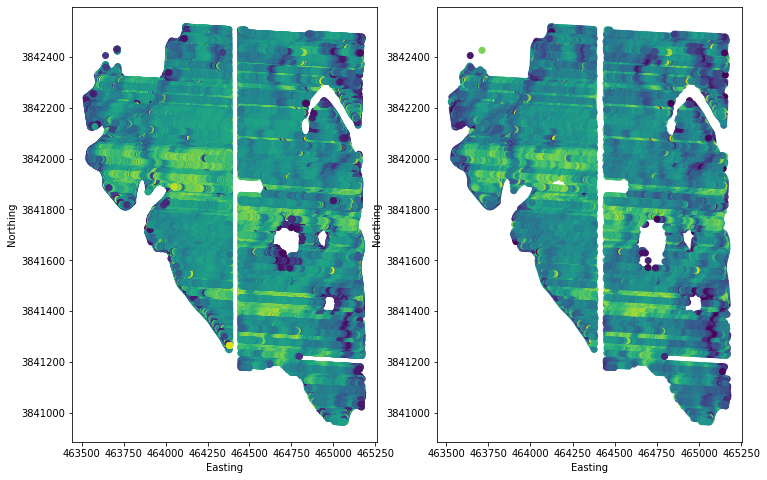

In [16]:
# Scatter plot of yield data to analyze its behavior
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.scatter(df_yield["X"], df_yield["Y"], c=df_yield["VRYIELDVOL"])
plt.xlabel('Easting')
plt.ylabel('Northing')

plt.subplot(1,2,2)
plt.scatter(df_filtered["X"], df_filtered["Y"], c=df_filtered["VRYIELDVOL"])
plt.xlabel('Easting')
plt.ylabel('Northing')


plt.colorbar(label="Yield (lbs/acre)")
plt.show()

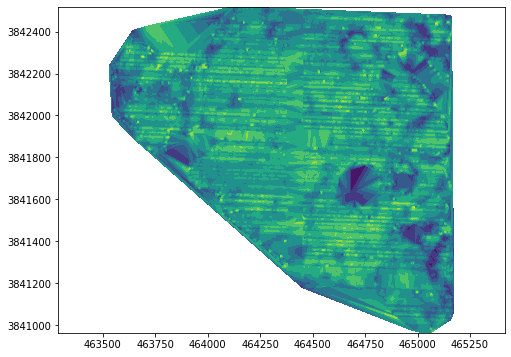

In [17]:
#Interpolate data
plt.figure(figsize=(8,6))
plt.tricontourf(df_filtered["X"], df_filtered["Y"], df_filtered["VRYIELDVOL"], levels=7)
plt.axis('equal')
plt.show()

In [18]:
# Reset index
df_filtered.reset_index(drop=True, inplace=True)
df_filtered.head()

,X,Y,VRYIELDVOL,IsoTime,Moisture,Datetime,seconds
0,464005.4015,3842332.719,118.491661,2018-09-03T17:37:10.190Z,17.46,2018-09-03 17:37:10.190000+00:00,10
1,464008.3202,3842342.048,147.974608,2018-09-03T17:37:35.179Z,15.37,2018-09-03 17:37:35.179000+00:00,35
2,464011.1472,3842350.344,180.382747,2018-09-03T17:37:40.179Z,15.35,2018-09-03 17:37:40.179000+00:00,40
3,464013.3809,3842358.989,184.011073,2018-09-03T17:37:45.180Z,15.49,2018-09-03 17:37:45.180000+00:00,45
4,464014.9388,3842367.817,198.547435,2018-09-03T17:37:50.180Z,15.33,2018-09-03 17:37:50.180000+00:00,50


## 7) Output

In [19]:
# FINAL OUTPUT - Salve dataframe to .csv object
df_filtered.to_csv("../output/filtered_yield.xlsx")  